In [1]:
import numpy as np

with open('data/volumetric_benchmark/bit_flip_probs.json', 'r') as infile:
    import json
    volumetric_data = json.load(infile)
    N = np.array(volumetric_data['N'])
    D = np.array(volumetric_data['D'])
    array_raw = np.asarray(volumetric_data['RAW'])
    array_mem = np.asarray(volumetric_data['MEM'])

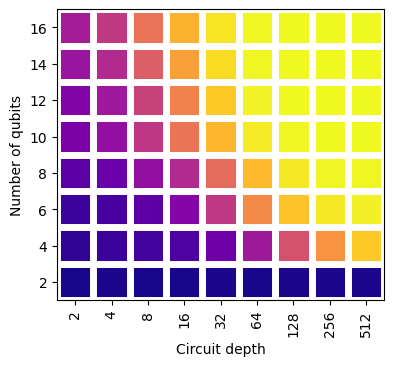

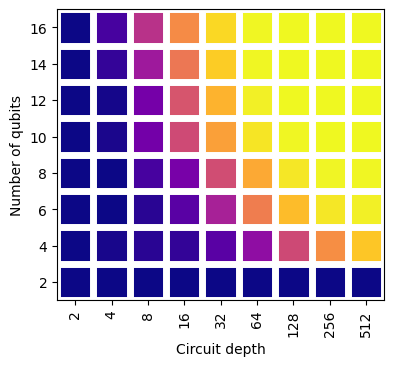

In [2]:
from matplotlib import pyplot as plt

def plot_volumetric_probability(data):
    _data = data.copy()[::-1]
    _data[_data==0]=np.nan

    fig,ax=plt.subplots(figsize=(4,4))
    fig.tight_layout()

    ax.imshow(_data, cmap=plt.cm.plasma_r, vmin=0, vmax=1, aspect=1)

    ax.set_xticks(np.arange(len(D)),D*2)
    ax.set_yticks(np.arange(len(N)),N[::-1])
    ax.set_xticks(np.arange(len(D)+1)-.5, minor=True)
    ax.set_yticks(np.arange(len(N)+1)-.5, minor=True)
    ax.set_ylabel('Number of qubits')
    ax.set_xlabel('Circuit depth')
    ax.grid(which='minor', color='w', linestyle='-', linewidth=5)
    ax.tick_params(which='minor', bottom=False, left=False)
    ax.set_xticklabels(D*2,rotation = 90)
    
    return fig

fig = plot_volumetric_probability(array_raw[0])
# fig.savefig('plots/volumetric_probability_RAW.pdf', dpi=300, bbox_inches='tight', transparent=True)
fig = plot_volumetric_probability(array_mem[0])
# fig.savefig('plots/volumetric_probability_MEM.pdf', dpi=300, bbox_inches='tight', transparent=True)

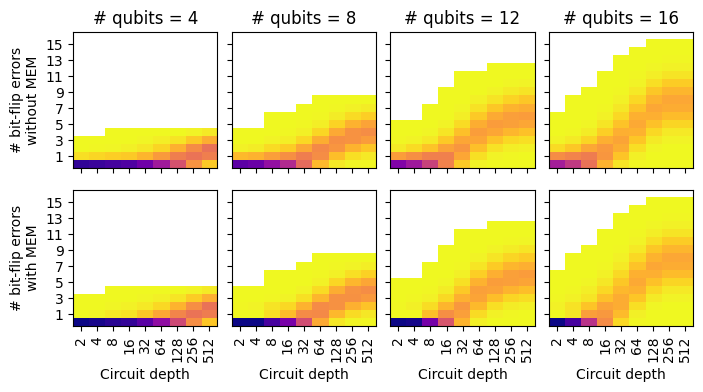

In [3]:
from matplotlib import pyplot as plt


fig,axes=plt.subplots(2,4,figsize=(8,4),sharex=True, sharey=True)
# fig.tight_layout()

for i in range(1,9,2):
    _arr_raw = array_raw.copy()[:,i,:][::-1]
    _arr_raw[_arr_raw==0]=np.nan
    _arr_mem = array_mem.copy()[:,i,:][::-1]
    _arr_mem[_arr_mem==0]=np.nan

    ax1,ax2=axes[0,i//2],axes[1,i//2]
    ax1.imshow(_arr_raw, cmap=plt.cm.plasma_r, vmin=0, vmax=1, aspect=0.5)
    ax2.imshow(_arr_mem, cmap=plt.cm.plasma_r, vmin=0, vmax=1, aspect=0.5)

    ax1.set_yticks(np.arange(1,17,2),np.arange(1,17,2)[::-1])
    # ax2.imshow(_arr_mem, cmap=plt.cm.plasma_r, vmin=0, vmax=1, aspect=0.4)
    ax2.set_xticks(np.arange(len(D)),D*2)
    ax2.set_xticklabels(D*2,rotation = 90)
    ax2.set_xlabel('Circuit depth')
    ax1.set_title(f'# qubits = {(i+1)*2}')

axes[0,0].set_ylabel('# bit-flip errors\nwithout MEM') 
axes[1,0].set_ylabel('# bit-flip errors\nwith MEM')
plt.subplots_adjust(wspace=0.1, hspace=0.05)

# fig.savefig('plots/bit_flip_errors.pdf', dpi=300, bbox_inches='tight', transparent=True)

/var/folders/wm/j6qnbfdn5sg3xfy711dv5jzw0000gn/T/ipykernel_42296/2538592137.py:2: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  hm = ax.imshow([[]],vmin=0,vmax=1,cmap=plt.cm.plasma_r)


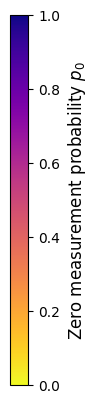

In [4]:
fig,ax=plt.subplots()
hm = ax.imshow([[]],vmin=0,vmax=1,cmap=plt.cm.plasma_r)
cb = plt.colorbar(hm, orientation='vertical')
ax.set_visible(False)
cb.set_label('Zero measurement probability $p_0$', fontsize=12)
# fig.savefig('plots/volumetric_colorbar.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [5]:
# # Uncomment to regenerate data:
# import numpy as np
# from evtools.sim_tools.utils import FinishedJob

# with open('data/volumetric_benchmark/volumetric_job_dict.json', 'r') as infile:
#     import json
#     job_dict = json.load(infile)

# N = np.array(job_dict['N'])
# D = np.array(job_dict['D'])

# array_raw = np.zeros((max(N)+1,len(N),len(D)))
# array_mem = np.zeros((max(N)+1,len(N),len(D)))

# for n in N:
#     for d in D:
#         i,j =n//2-1,int(np.log2(d))
#         job = FinishedJob(f"data/volumetric_benchmark/{n}/measurement_data_{n}_{d}.txt")
#         # without measurement-error mitigation
#         bitflips_raw = {}
#         for result in job.experiments:
#             for c,f in result.items():
#                 n_flips = len([i for i in c if i == '1'])
#                 bitflips_raw.setdefault(n_flips, 0)
#                 bitflips_raw[n_flips] += f/job.num_experiments
#         # with measurement-error mitigation
#         bitflips_mem = {}
#         for result in job.quasi_dists:
#             for c,f in result.items():
#                 n_flips = len([i for i in c if i == '1'])
#                 bitflips_mem.setdefault(n_flips, 0)
#                 bitflips_mem[n_flips] += f/job.num_experiments

#         for n_flip,p in bitflips_raw.items():
#             array_raw[n_flip,i,j] = p
#         for n_flip,p in bitflips_mem.items():
#             array_mem[n_flip,i,j] = p

# with open('data/volumetric_benchmark/bit_flip_probs.json', 'w') as outfile:
#     import json
#     json.dump(
#         {'N':N.astype(int).tolist(), 'D':D.astype(int).tolist(), 
#          'RAW': array_raw.tolist(), 'MEM': array_mem.tolist()},
#         outfile
#     )